# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [182]:
%matplotlib inline

In [217]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import os
import scipy.stats as sts
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [218]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [219]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

605

In [220]:
#create intitial dataframe to hold cities
#cities_df = pd.DataFrame(cities, columns = ['city_name'])

In [221]:
#add additional columns to dataframes
#cities_df['weather'] = ""
#cities_df.head()

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.

* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [222]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [223]:
# set up lists to hold reponse info
#temp cities for testing
#cities = ["Sheboygan", "Chicago", "Miami"]
#city_id = []

In [224]:
#counter for city numbers
counter = 1

#variables for weather data frame
city_name = []
lat = []
long = []
temp_imperial = []
humidity = []
cloudiness = []
wind_speed = []

print('Beginning City Data Retrieval')
print('------------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        #city = str.title()
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp_imperial.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        #print result city
        print(f'Processing Record #{counter} of #{len(cities)} initial results | {city}')
        #set counter
        counter = counter + 1
    except (KeyError, IndexError):
        print(f"City data for record #{counter} not found. Skipping...")
        counter = counter


#("city")str.title()
print('------------------------------')
print(f"End of City Data Retrieval. Total Weather Records Retrieved from original {len(cities)} is {counter}")
print('------------------------------')

Beginning City Data Retrieval
------------------------------
Processing Record #1 of #605 initial results | ferkessedougou
Processing Record #2 of #605 initial results | boke
Processing Record #3 of #605 initial results | cordoba
Processing Record #4 of #605 initial results | nanuque
Processing Record #5 of #605 initial results | yellowknife
Processing Record #6 of #605 initial results | hilo
Processing Record #7 of #605 initial results | rikitea
Processing Record #8 of #605 initial results | barrow
Processing Record #9 of #605 initial results | puerto ayora
Processing Record #10 of #605 initial results | luanda
Processing Record #11 of #605 initial results | vaini
Processing Record #12 of #605 initial results | ushuaia
Processing Record #13 of #605 initial results | georgetown
Processing Record #14 of #605 initial results | flinders
Processing Record #15 of #605 initial results | changde
Processing Record #16 of #605 initial results | dingle
Processing Record #17 of #605 initial resul

### Convert Raw Data to DataFrame

In [225]:
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': long,
                            'Temp': temp_imperial,
                            'Humidity': humidity,
                            'Cloudiness': cloudiness,
                            'Wind Speed': wind_speed
                            })

* Export the city data into a .csv.

In [226]:
pd.DataFrame.to_csv(city_data_df, '../output_data/city_weather_data.csv')

* Display the DataFrame

In [227]:
city_data_df.head()

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,Ferkessédougou,9.60,-5.20,73.71,89,100,4.94
1,Boké,10.94,-14.30,71.20,94,98,2.13
2,Córdoba,-31.41,-64.18,63.23,48,3,17.22
3,Nanuque,-17.84,-40.35,67.15,75,40,7.58
4,Yellowknife,62.46,-114.35,67.84,49,75,10.29


In [228]:
len(city_data_df)

562

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [229]:
#Get the indices of cities that have humidity over 100%.
#checking for High Humidity Cities and confirming visually
city_data_h_humid = city_data_df[city_data_df['Humidity'] > 99]
city_data_h_humid

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
71,Esperance,-33.87,121.90,44.60,100,90,12.75
93,Hasaki,35.73,140.83,66.07,100,75,2.24
132,Carnarvon,-24.87,113.63,50.00,100,0,8.05
182,Bitung,1.45,125.18,71.60,100,20,1.12
194,Lichinga,-13.31,35.24,49.14,100,28,9.95
208,Katsuura,35.13,140.30,68.47,100,75,3.36
242,Alyangula,-13.85,136.42,57.20,100,90,7.27
251,Perumpāvūr,10.13,76.48,77.00,100,90,2.08
279,Tapiramutá,-11.85,-40.79,61.95,100,87,8.66
307,Airai,-8.93,125.41,56.86,100,29,3.94


In [230]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [231]:
#Dropping rows of the High Humidity Cities if they exist and confirming the database count is lower.
clean_city_data = city_data_df.drop(city_data_df[city_data_df['Humidity'] > 99].index, inplace = False)
len(clean_city_data)

537

In [232]:
# Extract relevant fields from the data frame
clean_city_data.reset_index(drop=True, inplace=True)
clean_city_data

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,Ferkessédougou,9.60,-5.20,73.71,89,100,4.94
1,Boké,10.94,-14.30,71.20,94,98,2.13
2,Córdoba,-31.41,-64.18,63.23,48,3,17.22
3,Nanuque,-17.84,-40.35,67.15,75,40,7.58
4,Yellowknife,62.46,-114.35,67.84,49,75,10.29
...,...,...,...,...,...,...,...
532,Rosetta,31.40,30.42,78.80,61,0,9.17
533,Khorramshahr,30.44,48.17,100.40,24,0,6.93
534,Cururupu,-1.83,-44.87,75.79,88,9,1.90
535,Vargashi,55.36,65.85,69.06,78,82,3.02


In [233]:
# Export the City_Data into a csv
pd.DataFrame.to_csv(clean_city_data, '../output_data/clean_city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

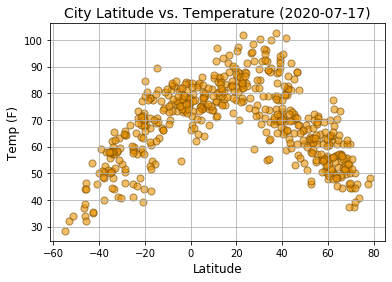

In [263]:
#I perfer to drop the alpha a bit. The overlay of the plots display a nice density.
plt.scatter(clean_city_data['Latitude'], clean_city_data['Temp'],
            marker="o", s=50, facecolors='#E99202', edgecolors='#754901', alpha=0.6)
plt.title(f"City Latitude vs. Temperature ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temp (F)", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_temp.png', bbox_inches='tight')
plt.show()


## Latitude vs. Humidity Plot

In [1]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'],
            marker="o", s=50, facecolors='#027886', edgecolors='#003036', alpha=0.6)
plt.title(f"City Latitude vs. Humidity ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_humidity.png', bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

## Latitude vs. Cloudiness Plot

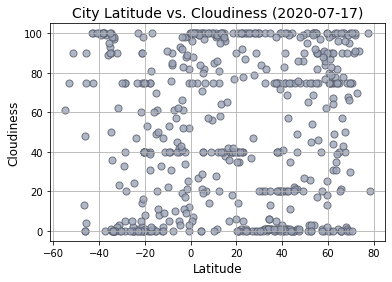

In [265]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'],
            marker="o", s=50, facecolors='#9DA5B9', edgecolors='#575C69', alpha=0.8)
plt.title(f"City Latitude vs. Cloudiness ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_clouds.png', bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

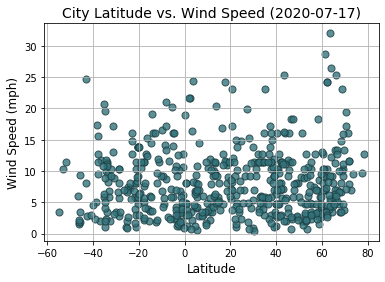

In [266]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'],
            marker="o", s=50, facecolors='#33747C', edgecolors='#1B3C40', alpha=0.8)
plt.title(f"City Latitude vs. Wind Speed ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_wind.png', bbox_inches='tight')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
from scipy.stats import linregress
# Calculate the correlation coefficient and linear regression model 
lat_line = clean_city_data.iloc[:,1]
temp_lin = clean_city_data.iloc[:,3]
correlation = sts.pearsonr(lat_line,temp_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = clean_city_data['Latitude']
y_values = clean_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"City Latitude vs. Temperature ({date.today()})", fontsize=14)
plt.xlabel("Mouse Weight (g)", fontsize=18)
plt.ylabel("Tumor Volume (mm3)", fontsize=18)
#plt.tight_layout()
plt.scatter(x_values,y_values, marker="o", s=150, facecolors="blue", edgecolors="grey", alpha=0.4)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The correlation between mouse weight {nreturn}and average tumor volume is {round(correlation[0],2)}")

#fig1 = plt.gcf()
plt.show()
#plt.draw()
#fig1.savefig("Images/MouseWeightTumor.png", bbox_inches = 'tight', dpi=100)



In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression